In [1]:
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split

# Setup plotting
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')


In [2]:
# 读取数据
fuel = pd.read_csv('../../input/dl-course-data/fuel.csv')

# 生成训练样本
X = fuel.copy()
y = X.pop('FE')

# 预处理器
preprocessor = make_column_transformer(
    (StandardScaler(), make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(sparse=False), make_column_selector(dtype_include=object)),
)

# 预处理
X = preprocessor.fit_transform(X)
y = np.log(y)  # log transform target instead of standardizing

input_shape = [X.shape[1]]

# 模型搭建
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1),
])

model.compile(optimizer="adam", loss="mae")

history = model.fit(
    X, y,
    validation_data=(X, y),
    batch_size=256,
    epochs=200,
)

2022-08-07 17:50:45.818543: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/200
5/5 [==============================] - 0s 34ms/step - loss: 3.1443 - val_loss: 2.4620
Epoch 2/200
5/5 [==============================] - 0s 7ms/step - loss: 2.0527 - val_loss: 1.2240
Epoch 3/200
5/5 [==============================] - 0s 11ms/step - loss: 0.9725 - val_loss: 0.9125
Epoch 4/200
5/5 [==============================] - 0s 7ms/step - loss: 0.9425 - val_loss: 0.7276
Epoch 5/200
5/5 [==============================] - 0s 8ms/step - loss: 0.5534 - val_loss: 0.4230
Epoch 6/200
5/5 [==============================] - 0s 8ms/step - loss: 0.4239 - val_loss: 0.3210
Epoch 7/200
5/5 [==============================] - 0s 7ms/step - loss: 0.3281 - val_loss: 0.3112
Epoch 8/200
5/5 [==============================] - 0s 7ms/step - loss: 0.2618 - val_loss: 0.2399
Epoch 9/200
5/5 [==============================] - 0s 7ms/step - loss: 0.2209 - val_loss: 0.1914
Epoch 10/200
5/5 [==============================] - 0s 7ms/step - loss: 0.1839 - val_loss: 0.1599
Epoch 11/200
5/5 [=========

5/5 [==============================] - 0s 8ms/step - loss: 0.0321 - val_loss: 0.0364
Epoch 85/200
5/5 [==============================] - 0s 8ms/step - loss: 0.0348 - val_loss: 0.0345
Epoch 86/200
5/5 [==============================] - 0s 7ms/step - loss: 0.0340 - val_loss: 0.0362
Epoch 87/200
5/5 [==============================] - 0s 7ms/step - loss: 0.0354 - val_loss: 0.0314
Epoch 88/200
5/5 [==============================] - 0s 7ms/step - loss: 0.0342 - val_loss: 0.0329
Epoch 89/200
5/5 [==============================] - 0s 7ms/step - loss: 0.0337 - val_loss: 0.0430
Epoch 90/200
5/5 [==============================] - 0s 6ms/step - loss: 0.0422 - val_loss: 0.0339
Epoch 91/200
5/5 [==============================] - 0s 7ms/step - loss: 0.0355 - val_loss: 0.0296
Epoch 92/200
5/5 [==============================] - 0s 7ms/step - loss: 0.0328 - val_loss: 0.0290
Epoch 93/200
5/5 [==============================] - 0s 7ms/step - loss: 0.0302 - val_loss: 0.0290
Epoch 94/200
5/5 [===============

5/5 [==============================] - 0s 7ms/step - loss: 0.0274 - val_loss: 0.0271
Epoch 168/200
5/5 [==============================] - 0s 7ms/step - loss: 0.0276 - val_loss: 0.0280
Epoch 169/200
5/5 [==============================] - 0s 7ms/step - loss: 0.0272 - val_loss: 0.0270
Epoch 170/200
5/5 [==============================] - 0s 7ms/step - loss: 0.0262 - val_loss: 0.0266
Epoch 171/200
5/5 [==============================] - 0s 7ms/step - loss: 0.0279 - val_loss: 0.0251
Epoch 172/200
5/5 [==============================] - 0s 7ms/step - loss: 0.0264 - val_loss: 0.0278
Epoch 173/200
5/5 [==============================] - 0s 7ms/step - loss: 0.0259 - val_loss: 0.0286
Epoch 174/200
5/5 [==============================] - 0s 7ms/step - loss: 0.0271 - val_loss: 0.0331
Epoch 175/200
5/5 [==============================] - 0s 7ms/step - loss: 0.0307 - val_loss: 0.0393
Epoch 176/200
5/5 [==============================] - 0s 7ms/step - loss: 0.0344 - val_loss: 0.0273
Epoch 177/200
5/5 [=====

<AxesSubplot:>

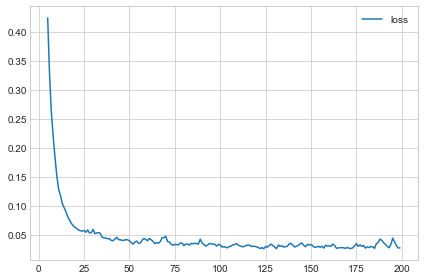

In [3]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)

# use Pandas native plot method
history_df.loc[5:, ['loss']].plot()